<a href="https://colab.research.google.com/github/beepbooplearns/NUS-SDS-Datathon-Singlife/blob/main/NUS_DATATHON_SINGLIFE_NUS_76.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [354]:
#%pip install pandas
#%pip install matplotlib
#%pip install seaborn
#%pip install sklearn
#%pip install numpy
# add commented pip installation lines for packages used as shown above for ease of testing
# the line should be of the format %pip install PACKAGE_NAME

In [355]:
# Can have as many cells as you want for code

filepath = "./data/catB_train.parquet"

# the initialised filepath MUST be a relative path to a folder named data that contains the parquet file

In [356]:
# import libraries
import pandas as pd
import numpy as np

# extracting data
df = pd.read_parquet(filepath)

## **General information of the data**

We first observe the structure of the data.

In [357]:
# dimension of the data
df.shape # (rows,cols)

(17992, 304)

In [358]:
# print first 5 rows to have an overview
df.head()

,clntnum,race_desc,ctrycode_desc,clttype,stat_flag,min_occ_date,cltdob_fix,cltsex_fix,flg_substandard,flg_is_borderline_standard,...,recency_giclaim,giclaim_cnt_success,recency_giclaim_success,giclaim_cnt_unsuccess,recency_giclaim_unsuccess,flg_gi_claim_29d435_ever,flg_gi_claim_058815_ever,flg_gi_claim_42e115_ever,flg_gi_claim_856320_ever,f_purchase_lh
19550,91b546e924,Chinese,Singapore,P,ACTIVE,2017-10-31,1974-05-09,Female,0.0,0.0,...,NaN,None,None,None,None,None,None,None,None,NaN
4600,896bae548c,Chinese,Singapore,P,ACTIVE,2007-05-23,1979-11-11,Male,0.0,0.0,...,NaN,None,None,None,None,None,None,None,None,NaN
13337,f364439ae6,Others,Singapore,P,ACTIVE,2019-08-31,1976-01-28,Male,0.0,0.0,...,NaN,None,None,None,None,None,None,None,None,NaN
15074,70f319cfe1,Chinese,Singapore,P,ACTIVE,2021-10-18,1976-03-19,Female,0.0,0.0,...,NaN,None,None,None,None,None,None,None,None,NaN
19724,2647a81328,Chinese,Singapore,P,ACTIVE,2018-07-20,1995-07-31,Female,0.0,0.0,...,NaN,None,None,None,None,None,None,None,None,NaN


In [359]:
# prints information of this dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17992 entries, 19550 to 15795
Columns: 304 entries, clntnum to f_purchase_lh
dtypes: float64(44), int64(46), object(214)
memory usage: 41.9+ MB


In [360]:
# basic statistics of the dataframe
df.describe()

,flg_substandard,flg_is_borderline_standard,flg_is_revised_term,flg_is_rental_flat,flg_has_health_claim,flg_has_life_claim,flg_gi_claim,flg_is_proposal,flg_with_preauthorisation,flg_is_returned_mail,...,hlthclaim_cnt_success,recency_hlthclaim_success,hlthclaim_cnt_unsuccess,recency_hlthclaim_unsuccess,flg_hlthclaim_839f8a_ever,recency_hlthclaim_839f8a,flg_hlthclaim_14cb37_ever,recency_hlthclaim_14cb37,recency_giclaim,f_purchase_lh
count,16978.000000,16978.000000,16978.000000,16978.000000,16978.000000,16978.000000,16978.000000,16978.000000,16978.000000,16978.000000,...,1277.000000,1277.000000,610.000000,610.000000,285.0,285.000000,1375.0,1375.000000,448.000000,710.0
mean,0.040287,0.033102,0.000707,0.012546,0.048769,0.003593,0.033278,0.002886,0.008246,0.019260,...,7.802662,40.870008,2.455738,49.409836,1.0,46.077193,1.0,42.176000,39.997768,1.0
std,0.196638,0.178907,0.026577,0.111306,0.215391,0.059835,0.179368,0.053646,0.090435,0.137442,...,16.005638,35.084520,3.694247,34.932248,0.0,34.288046,0.0,35.548718,30.329252,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,1.0,0.000000,1.0,0.000000,0.000000,1.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,10.000000,1.000000,18.000000,1.0,18.000000,1.0,11.000000,12.000000,1.0
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.000000,31.000000,2.000000,45.000000,1.0,42.000000,1.0,33.000000,40.000000,1.0
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,8.000000,67.000000,3.000000,78.000000,1.0,72.000000,1.0,68.000000,58.000000,1.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,219.000000,126.000000,68.000000,126.000000,1.0,124.000000,1.0,126.000000,144.000000,1.0


In [361]:
# find out how many NA values for dataframe
df.isna().sum()

clntnum                         0
race_desc                    3996
ctrycode_desc                  20
clttype                         0
stat_flag                       0
                            ...  
flg_gi_claim_29d435_ever    17992
flg_gi_claim_058815_ever    17992
flg_gi_claim_42e115_ever    17992
flg_gi_claim_856320_ever    17992
f_purchase_lh               17282
Length: 304, dtype: int64

In [362]:
# find out how many zeros for dataframe
df[df==0].count()

clntnum                     0
race_desc                   0
ctrycode_desc               0
clttype                     0
stat_flag                   0
                           ..
flg_gi_claim_29d435_ever    0
flg_gi_claim_058815_ever    0
flg_gi_claim_42e115_ever    0
flg_gi_claim_856320_ever    0
f_purchase_lh               0
Length: 304, dtype: int64

We will then fill the NA values in the target column with 0.

In [363]:
# converting target column to 0 or 1
df["f_purchase_lh"] = df["f_purchase_lh"].fillna(0)

### **Extracting important non-numeric variables for data visualisation**

In [364]:
# extracting race variable
race = df["race_desc"]

# extracting status flag variable
status_flag = df["stat_flag"]

# extracting gender variable
gender = df["cltsex_fix"]

# extracting date-of-birth variable
dob = df["cltdob_fix"]

# extract country_code
country_code = df["ctrycode_desc"]

# No. of people who've never bought GI
no_gi = (df["f_ever_bought_gi"] == 0).sum()

# No. of people who've ever bought GI
got_gi = (df["f_ever_bought_gi"] == 1).sum()

#print(df["f_ever_bought_gi"].unique())
#print(df["f_purchase_lh"].unique())
#print(no_gi) #15882
#print(got_gi)#2110

# No. of people who might buy
got_lh = (df["f_purchase_lh"] == 1).sum()
#print(got_lh) #710

# No. of people who's not likely to buy
no_lh = (df["f_purchase_lh"] == 0).sum()
#print(no_lh) #17282

# Got GI but not looking to buy more
got_gi_no_lh = ((df["f_purchase_lh"] == 0) & (df["f_ever_bought_gi"] == 1)).sum()
#print(got_gi_no_lh) #1807

# Got GI and still likely to buy
got_both = ((df['f_purchase_lh'] == 1) & (df['f_ever_bought_gi'] == 1)).sum()
#print(got_both) #303

# No GI but likely to buy
no_gi_got_lh = ((df["f_purchase_lh"] == 1) & (df["f_ever_bought_gi"] == 0)).sum()
#print(no_gi_got_lh) #407

# No GI and not looking to buy
no_both = ((df['f_purchase_lh'] == 0) & (df['f_ever_bought_gi'] == 0)).sum()
#print(no_both) #15475

### **Data Cleaning**

We first drop all columns that are more than half empty since they will not provide sufficient information for analysis.

In [365]:
cols = list(df.columns.values)

# to detect which columns are more than half empty
thresh = 50
for i in range(df.shape[1]):
 col = cols[i]
 if df[col].isna().sum()/df.shape[0]*100 > thresh:
    # remove the columns from dataset due to insufficient information
    df.drop(columns = [col], inplace = True)

df.head()

,clntnum,race_desc,ctrycode_desc,clttype,stat_flag,min_occ_date,cltdob_fix,cltsex_fix,flg_substandard,flg_is_borderline_standard,...,n_months_last_bought_grp_fe5fb8,n_months_last_bought_grp_94baec,n_months_last_bought_grp_e91421,n_months_last_bought_lh_f852af,n_months_last_bought_lh_947b15,n_months_last_bought_32c74c,f_elx,f_mindef_mha,f_retail,f_purchase_lh
19550,91b546e924,Chinese,Singapore,P,ACTIVE,2017-10-31,1974-05-09,Female,0.0,0.0,...,9999,9999,9999,9999,9999,9999,0,0,1,0.0
4600,896bae548c,Chinese,Singapore,P,ACTIVE,2007-05-23,1979-11-11,Male,0.0,0.0,...,9999,9999,9999,9999,9999,9999,0,0,1,0.0
13337,f364439ae6,Others,Singapore,P,ACTIVE,2019-08-31,1976-01-28,Male,0.0,0.0,...,9999,9999,9999,9999,9999,9999,0,0,1,0.0
15074,70f319cfe1,Chinese,Singapore,P,ACTIVE,2021-10-18,1976-03-19,Female,0.0,0.0,...,9999,9999,9999,9999,9999,9999,0,0,1,0.0
19724,2647a81328,Chinese,Singapore,P,ACTIVE,2018-07-20,1995-07-31,Female,0.0,0.0,...,9999,9999,9999,9999,9999,9999,0,0,1,0.0


We will then identify the numeric columns left after the filtering.

In [366]:
# Identify numeric columns and fill null values with the median value
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns
df[numeric_cols] = df[numeric_cols].apply(lambda x: x.fillna(x.median()))

To check the correlation between numeric variable and f_purchase_lh, we will drop the non-numeric columns temporarily.

In [367]:
# Drop non-numeric cols
non_numeric_cols = df.select_dtypes(include=["string", "object"]).columns
df = df.drop(columns=non_numeric_cols)

Now, we will check the correlation of the remaining numeric variables with f_purchase_lh.

In [368]:
cols = list(df.columns.values)

# to detect which columns have low correlation with the target column
for i in range(df.shape[1]):
 col = cols[i]
 print(col, df[col].corr(df['f_purchase_lh']))

flg_substandard 0.03434635934692404
flg_is_borderline_standard 0.01940174525654493
flg_is_revised_term 0.005821434936286341
flg_is_rental_flat -0.01690659772629242
flg_has_health_claim 0.016793167386510162
flg_has_life_claim 0.007822625345979738
flg_gi_claim 0.14192429951182034
flg_is_proposal 0.0606195354968435
flg_with_preauthorisation 0.0015443084952835044
flg_is_returned_mail -0.019028785107318334
is_consent_to_mail -0.04940692649905806
is_consent_to_email -0.002722746690848385
is_consent_to_call -0.05045410144399692
is_consent_to_sms -0.032231401891437764
is_valid_dm 0.10078448756130881
is_valid_email 0.10389673929993581
is_housewife_retiree 0.05672324670724
is_sg_pr 0.04889558832146265
is_class_1_2 0.05797192301183909
is_dependent_in_at_least_1_policy nan
hh_size -0.018266110222504392
n_months_last_bought_products -0.07888116608591804
flg_latest_being_lapse 0.09535704601134938
flg_latest_being_cancel 0.01286227995176234
tot_inforce_pols 0.09154090465004541
f_hold_839f8a 0.0845883


The individual numerical variables have low correlation with the target variable so we believe that all of them may contribute to the prediction. Hence, we decided to keep all of them to let the model learn the relationships during training.

Following which, we will reinsert back important non-numeric variables back into the dataset.

In [369]:
# Reinserting gender, status_flag, dob, race back into dataset
df.insert(1, "gender", gender)
df.insert(2, "status_flag", status_flag)
df.insert(3, "dob", dob)
df.insert(4, "race", race)
df.insert(5, "country_code", country_code)
df['country_code'] = np.where(df['country_code'] == 'Singapore', 'Singapore', 'Others')

print(df.shape)
df.head()

(17992, 73)


,flg_substandard,gender,status_flag,dob,race,country_code,flg_is_borderline_standard,flg_is_revised_term,flg_is_rental_flat,flg_has_health_claim,...,f_ever_bought_grp_fe5fb8,f_ever_bought_grp_94baec,f_ever_bought_grp_e91421,f_ever_bought_lh_f852af,f_ever_bought_lh_947b15,f_ever_bought_32c74c,f_elx,f_mindef_mha,f_retail,f_purchase_lh
19550,0.0,Female,ACTIVE,1974-05-09,Chinese,Singapore,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0.0
4600,0.0,Male,ACTIVE,1979-11-11,Chinese,Singapore,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0.0
13337,0.0,Male,ACTIVE,1976-01-28,Others,Singapore,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0.0
15074,0.0,Female,ACTIVE,1976-03-19,Chinese,Singapore,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0.0
19724,0.0,Female,ACTIVE,1995-07-31,Chinese,Singapore,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0.0


### **Visualisations**

In [370]:
import seaborn as sns
import matplotlib.pyplot as plt

<Figure size 1000x600 with 0 Axes>

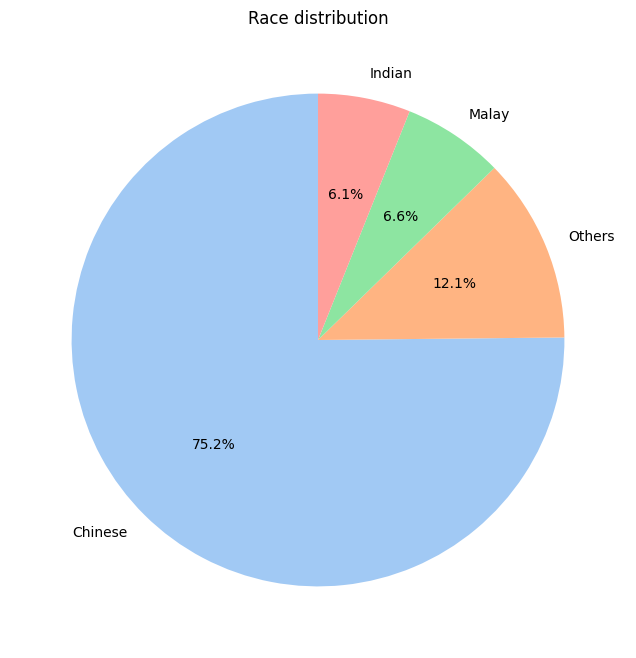

In [371]:
#Pie chart: Different races
plt.figure(figsize=(10, 6))
race_counts = df['race'].value_counts()
plt.figure(figsize=(8, 8))
sns.set_palette('pastel')
race_counts.plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Race distribution')
plt.ylabel('')
plt.show()

Majority of the people who were in the dataset are Chinese, with a percentage of 75.2.

<ipython-input-372-3b70bf0ed394>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'race', y = 'f_purchase_lh', data = df, palette='pastel')


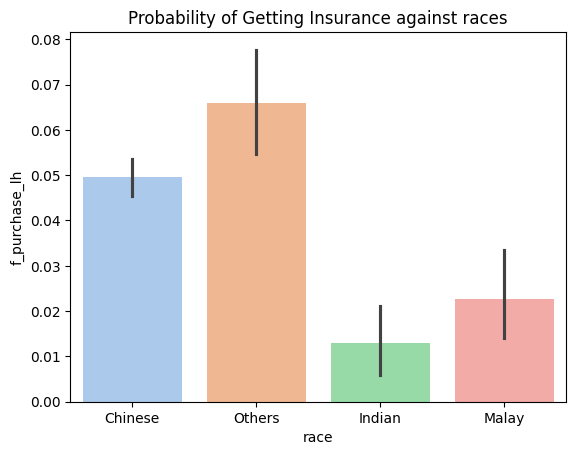

In [372]:
#Bar graph: the different races getting an insurance
sns.barplot(x = 'race', y = 'f_purchase_lh', data = df, palette='pastel')
plt.title('Probability of Getting Insurance against races')
plt.show()

<ipython-input-373-a8c3a19f5b98>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'gender', y = 'f_purchase_lh', data = df, palette= colours)


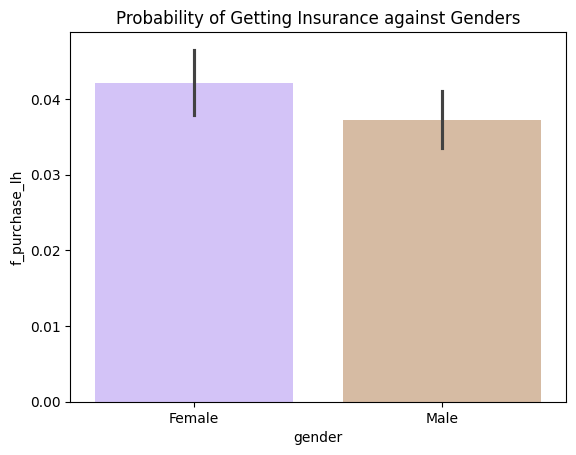

In [373]:
#Bar graph: the different genders getting an insurance
colours = {'Male': sns.color_palette("pastel")[5], 'Female': sns.color_palette("pastel")[4]}
sns.barplot(x = 'gender', y = 'f_purchase_lh', data = df, palette= colours)
plt.title('Probability of Getting Insurance against Genders')
plt.show()

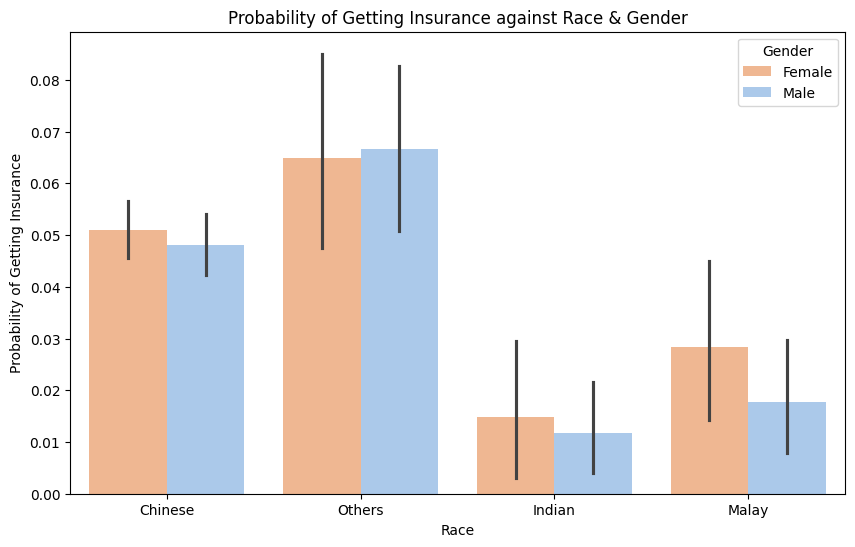

In [374]:
#Bar graph: the differnt races & genders getting an insurance
plt.figure(figsize=(10, 6))
colours = {'Male': sns.color_palette("pastel")[0], 'Female': sns.color_palette("pastel")[1]}
sns.barplot(x='race', y='f_purchase_lh', hue='gender', data=df, palette=colours)
plt.xlabel('Race')
plt.ylabel('Probability of Getting Insurance')
plt.title('Probability of Getting Insurance against Race & Gender')
plt.legend(title='Gender')
plt.show()

We observe that those in the "Chinese" and "Others" races are more likely to purchase Singlife products than those in "Indian" and "Malay" races. There does not seem to be much relation between gender and whether or not one will purchase Singlife products.

Text(0.5, 1.0, 'Probability of Getting Insurance between Singapore and Other Countries')

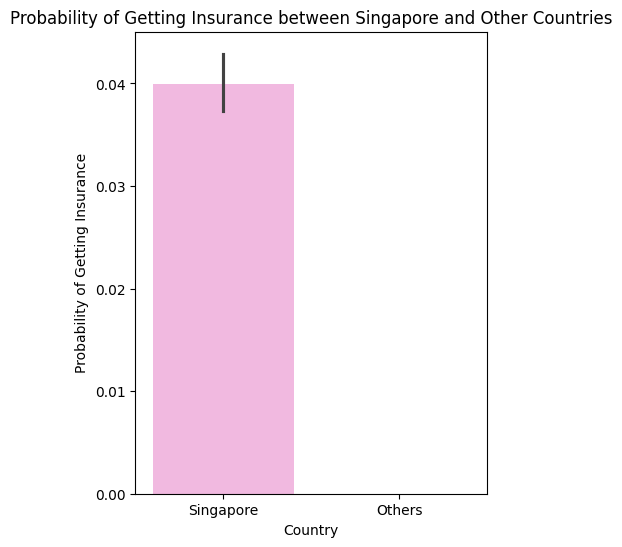

In [375]:
#Bar graph: country code against f_purchase
singapore_data = df[df['country_code'] == 'Singapore']
other_countries_data = df[df['country_code'] != 'Singapore']
merged_data = pd.concat([singapore_data, other_countries_data], ignore_index=True)
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.barplot(x = 'country_code', y = 'f_purchase_lh', data = df, color=sns.color_palette("pastel")[6])
plt.xlabel('Country')
plt.ylabel('Probability of Getting Insurance')
plt.title('Probability of Getting Insurance between Singapore and Other Countries')

We can observe that only customers located in Singapore are likely to purchase Singlife products.

count    17970.000000
mean        45.588759
std         12.392547
min         10.000000
25%         36.000000
50%         45.000000
75%         54.000000
max        100.000000
Name: age, dtype: float64


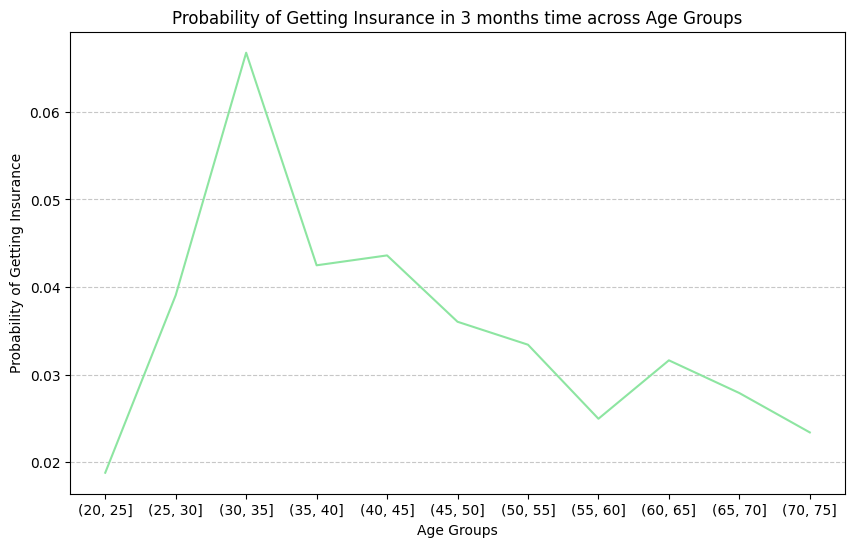

In [376]:
#Line graph: Age against purchase
dob.isna().sum()
df = df.dropna(subset=['dob'])
df['dob'] = pd.to_datetime(df['dob'], format='%Y-%m-%d', errors='coerce') #change to time type
current_year = 2024
df['age'] = current_year - df['dob'].dt.year # Calculate age and add a new column 'age'
print(df['age'].describe()) #describe the distribution

age_interval = range(20, 80, 5)  # Adjust the range based on your age data
df['age_group'] = pd.cut(df['age'], bins=age_interval) # Create age groups
grouped_data = df.groupby('age_group')['f_purchase_lh'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(grouped_data['age_group'].astype(str), grouped_data['f_purchase_lh'], color=sns.color_palette("pastel")[2])
plt.xlabel('Age Groups')
plt.ylabel('Probability of Getting Insurance')
plt.title('Probability of Getting Insurance in 3 months time across Age Groups')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


We can conclude that among the different age groups, those in the 30-35 age range have the highest probability of getting insurance in 3 months time.


<Figure size 1000x600 with 0 Axes>

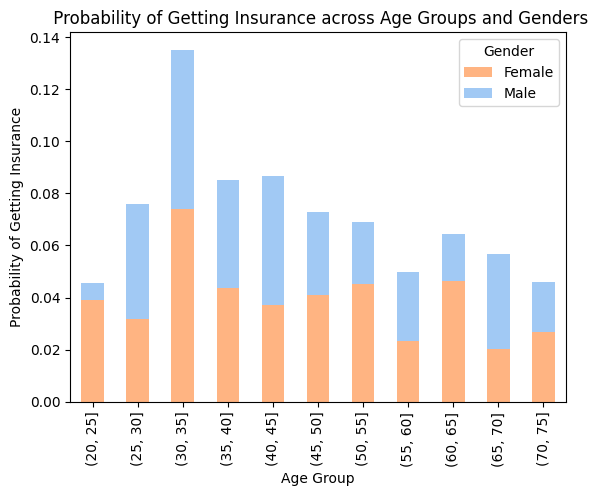

In [377]:
#Stack bar graph
colours = {'Male': sns.color_palette("pastel")[0], 'Female': sns.color_palette("pastel")[1]}
plotdata = df.pivot_table(index='age_group', columns='gender', values='f_purchase_lh', aggfunc='mean')
plt.figure(figsize=(10, 6))
plotdata.plot(kind='bar', stacked=True, color=[colours[col] for col in plotdata.columns])
plt.xlabel('Age Group')
plt.ylabel('Probability of Getting Insurance')
plt.title(' Probability of Getting Insurance across Age Groups and Genders')
plt.legend(title='Gender')
plt.show()

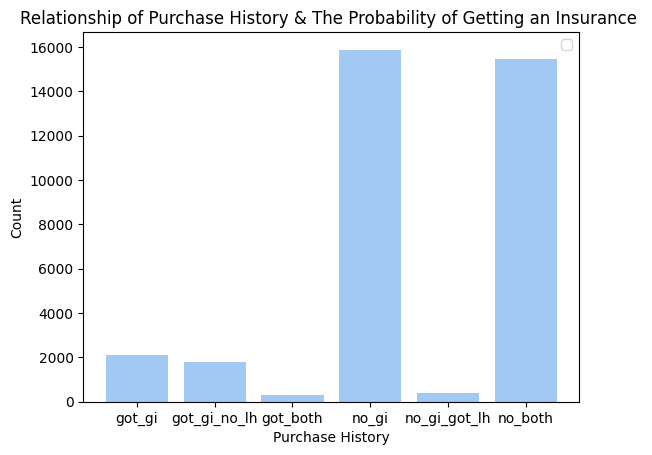

In [378]:
#Bar graph between purchasing history & probability of getting an insurance in 3 months time
labels = ['got_gi', 'got_gi_no_lh','got_both', 'no_gi', 'no_gi_got_lh', 'no_both']
values = [got_gi, got_gi_no_lh, got_both, no_gi, no_gi_got_lh, no_both]

plt.bar(labels, values)
plt.xlabel('Purchase History')
plt.ylabel('Count')
plt.title('Relationship of Purchase History & The Probability of Getting an Insurance ')
plt.legend()
plt.show()

### **Dealing with imbalanced data**

In [379]:
# drop non-numeric columns that will not be used in the model
non_numeric_cols = df.select_dtypes(include=["string", "object"]).columns
df = df.drop(columns=non_numeric_cols)
df = df.drop(columns = ['age_group','age','dob'])

In [380]:
# assign y as label and x as predictors
y = df["f_purchase_lh"]
X = df.drop(columns=['f_purchase_lh'])

In [381]:
# rebalance the data
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)

print('Before:', Counter(y_train))
X_train, y_train = SMOTE().fit_resample(X_train, y_train)
print('After:', Counter(y_train))

Before: Counter({0.0: 13809, 1.0: 584})
After: Counter({1.0: 13809, 0.0: 13809})


### **Modelling**

In [382]:
# knn

# import the necessary class from the scikit-learn library
from sklearn.neighbors import KNeighborsClassifier

# assume X_train, y_train are df/numpy objects
knn_clf = KNeighborsClassifier(n_neighbors=2)
knn_clf.fit(X_train, y_train)
print("train accuracy: ", knn_clf.score(X_train, y_train))
print("val accuracy: ", knn_clf.score(X_val, y_val))

train accuracy:  0.9917807227170686
val accuracy:  0.8858016115587664


In [383]:
# decision tree

from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)
print("train accuracy: ", dt_clf.score(X_train, y_train))
print("val accuracy: ", dt_clf.score(X_val, y_val))

train accuracy:  0.9999637917300311
val accuracy:  0.9160878021672687


In [384]:
# random forest

from sklearn.ensemble import RandomForestClassifier

rndforest_clf = RandomForestClassifier()
rndforest_clf.fit(X_train, y_train)
print("train accuracy: ", rndforest_clf.score(X_train, y_train))
print("val accuracy: ", rndforest_clf.score(X_val, y_val))

train accuracy:  0.9999637917300311
val accuracy:  0.9444290080577938


Since the random forest classifier has the highest accuracy, we will use it as our model.

In [385]:
def load_model(training_data):
    # drop too empty columns
    cols = list(training_data.columns.values)
    thresh = 50
    for i in range(training_data.shape[1]):
      col = cols[i]
      if training_data[col].isna().sum()/training_data.shape[0]*100 > thresh:
        training_data.drop(columns = [col], inplace = True)

    # fill null values in numeric columns
    numeric_cols = training_data.select_dtypes(include=["int64", "float64"]).columns
    training_data[numeric_cols] = training_data[numeric_cols].apply(lambda x: x.fillna(x.median()))

    # drop non-numeric columns
    non_numeric_cols = training_data.select_dtypes(include=["string", "object"]).columns
    training_data = training_data.drop(columns=non_numeric_cols)

    # training model
    y = training_data["f_purchase_lh"]
    X = training_data.drop(columns=['f_purchase_lh'])

    from collections import Counter
    from imblearn.over_sampling import SMOTE
    from sklearn.model_selection import train_test_split

    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)
    X_train, y_train = SMOTE().fit_resample(X_train, y_train)

    model = RandomForestClassifier()
    model.fit(X_train, y_train)

## The cell below is **NOT** to be removed
##### The function is to be amended so that it accepts the given input (dataframe) and returns the required output (list).
##### It is recommended to test the function out prior to submission
-------------------------------------------------------------------------------------------------------------------------------
##### The hidden_data parsed into the function below will have the same layout columns wise as the dataset *SENT* to you
##### Thus, ensure that steps taken to modify the initial dataset to fit into the model are also carried out in the function below

In [388]:
def testing_hidden_data(hidden_data: pd.DataFrame) -> list:
    '''DO NOT REMOVE THIS FUNCTION.

The function accepts a dataframe as input and return an iterable (list)
of binary classes as output.

The function should be coded to test on hidden data
and should include any preprocessing functions needed for your model to perform.

All relevant code MUST be included in this function.'''
    # modify the test data
    # drop too empty columns
    cols = list(hidden_data.columns.values)
    thresh = 50
    for i in range(hidden_data.shape[1]):
      col = cols[i]
      if hidden_data[col].isna().sum()/hidden_data.shape[0]*100 > thresh:
        hidden_data.drop(columns = [col], inplace = True)

    # fill null values in numeric columns
    numeric_cols = hidden_data.select_dtypes(include=["int64", "float64"]).columns
    hidden_data[numeric_cols] = hidden_data[numeric_cols].apply(lambda x: x.fillna(x.median()))

    # drop non-numeric columns
    non_numeric_cols = hidden_data.select_dtypes(include=["string", "object"]).columns
    hidden_data = hidden_data.drop(columns=non_numeric_cols)

    # make prediction
    result = [rndforest_clf.predict(hidden_data)]
    return result

##### Cell to check testing_hidden_data function

In [389]:
# This cell should output a list of predictions.
test_df = pd.read_parquet(filepath)
test_df = test_df.drop(columns=["f_purchase_lh"])
print(testing_hidden_data(test_df))

[array([0., 0., 0., ..., 0., 0., 0.])]
